In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve

In [2]:
data_file = pd.read_csv('creditcard.csv')
data_file.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [3]:
print(data_file.shape)

(284807, 31)


In [4]:
data_file.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

           ...                 V21           V22           V23           V24  \
count      ...        2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean       ...        1.537294e-16  7.959909e-16  5.367590e-16  4.458112e-15   
std        ...        7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min        ...       -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%        ...       -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%        ...       -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%        ...        1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max        ...        2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.453003e-15  1.699104e-15 -3.660161e-16 -1.206049e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [5]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
data_file.isnull().values.any()

False

In [7]:
data_file.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
fraud = len(data_file[data_file.Class == 1])
no_fraud = len(data_file[data_file.Class == 0])
print('Jane vetem '+ str(fraud) + ' mashtrime ne dataset, ndersa ' + str(no_fraud) +' te verteta.')

Jane vetem 492 mashtrime ne dataset, ndersa 284315 te verteta.


In [9]:
fraud = data_file[data_file['Class']==1]
normal = data_file[data_file['Class']==0]

print('Numri i rekordeve mashtruese ne dataset',fraud.shape)
print('Numri i rekordeve normale ne dataset',normal.shape)

Numri i rekordeve mashtruese ne dataset (492, 31)
Numri i rekordeve normale ne dataset (284315, 31)


In [10]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

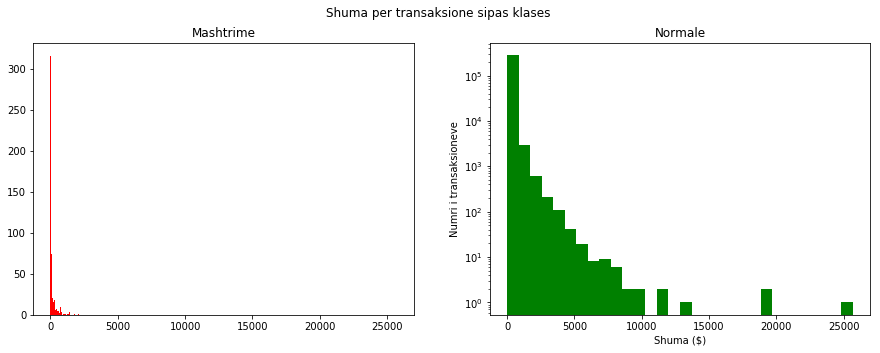

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Shuma per transaksione sipas klases')
bins = 30

ax1.hist(data_file.Amount[data_file.Class == 1], bins=bins, color="Red")
ax1.set_title('Mashtrime')

ax2.hist(data_file.Amount[data_file.Class == 0], bins=bins, color="Green")
ax2.set_title('Normale')

plt.xlabel('Shuma ($)')
plt.ylabel('Numri i transaksioneve')
plt.yscale('log')
plt.show()

Text(0, 0.5, 'Numri i transaksioneve')

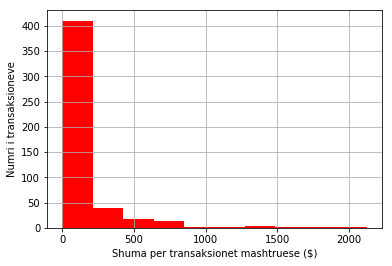

In [13]:
fraud_amount = data_file.Amount[data_file.Class == 1]
fraud_amount.hist(color = "Red")
plt.xlabel("Shuma per transaksionet mashtruese ($)")
plt.ylabel("Numri i transaksioneve")

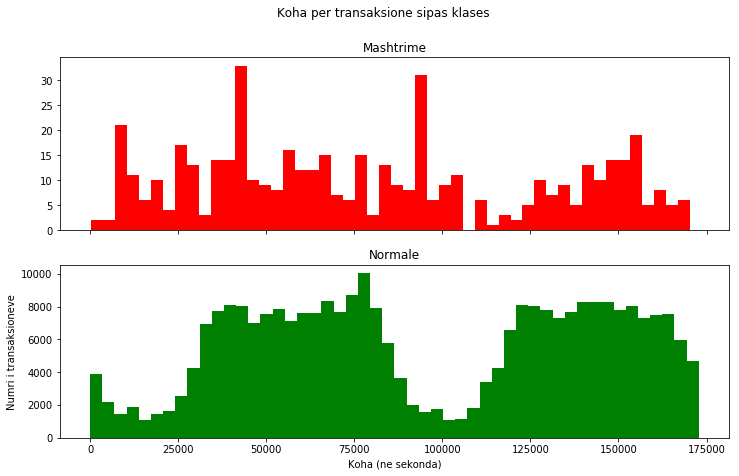

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,7))
fig.suptitle('Koha per transaksione sipas klases')
bins = 50

ax1.hist(data_file.Time[data_file.Class == 1], bins = bins, color="Red")
ax1.set_title('Mashtrime')

ax2.hist(data_file.Time[data_file.Class == 0], bins = bins, color="Green")
ax2.set_title('Normale')

plt.xlabel('Koha (ne sekonda)')
plt.ylabel('Numri i transaksioneve')
plt.show()

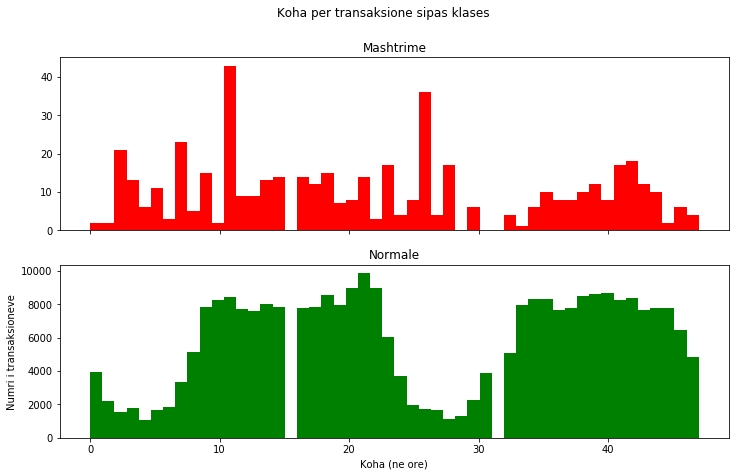

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,7))
fig.suptitle('Koha per transaksione sipas klases')
bins = 50
fraud_time = data_file.Time[data_file.Class == 1]
fraud = fraud_time // 3600
normal_time = data_file.Time[data_file.Class == 0]
normal = normal_time // 3600
ax1.hist(fraud, bins=bins, color="Red")
ax1.set_title('Mashtrime')
ax2.hist(normal, bins=bins, color="Green")
ax2.set_title('Normale')
plt.xlabel('Koha (ne ore)')
plt.ylabel('Numri i transaksioneve')
plt.show()

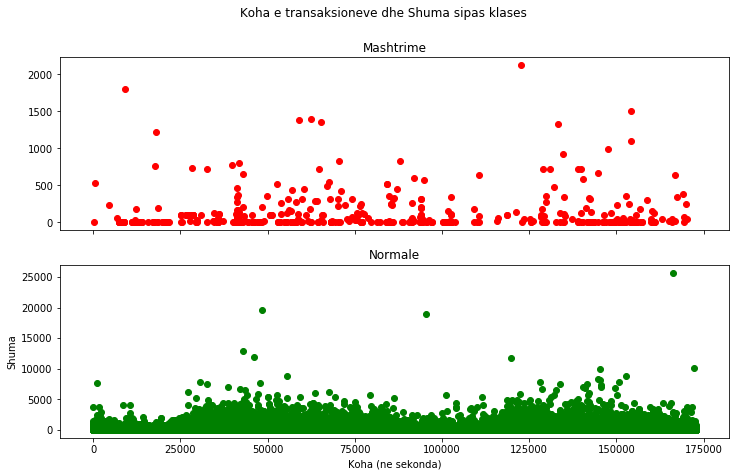

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,7))
fig.suptitle('Koha e transaksioneve dhe Shuma sipas klases')

ax1.scatter(data_file.Time[data_file.Class == 1], data_file.Amount[data_file.Class == 1], color="Red")
ax1.set_title('Mashtrime')

ax2.scatter(data_file.Time[data_file.Class == 0], data_file.Amount[data_file.Class == 0], color="Green")
ax2.set_title('Normale')

plt.xlabel('Koha (ne sekonda)')
plt.ylabel('Shuma')
plt.show()

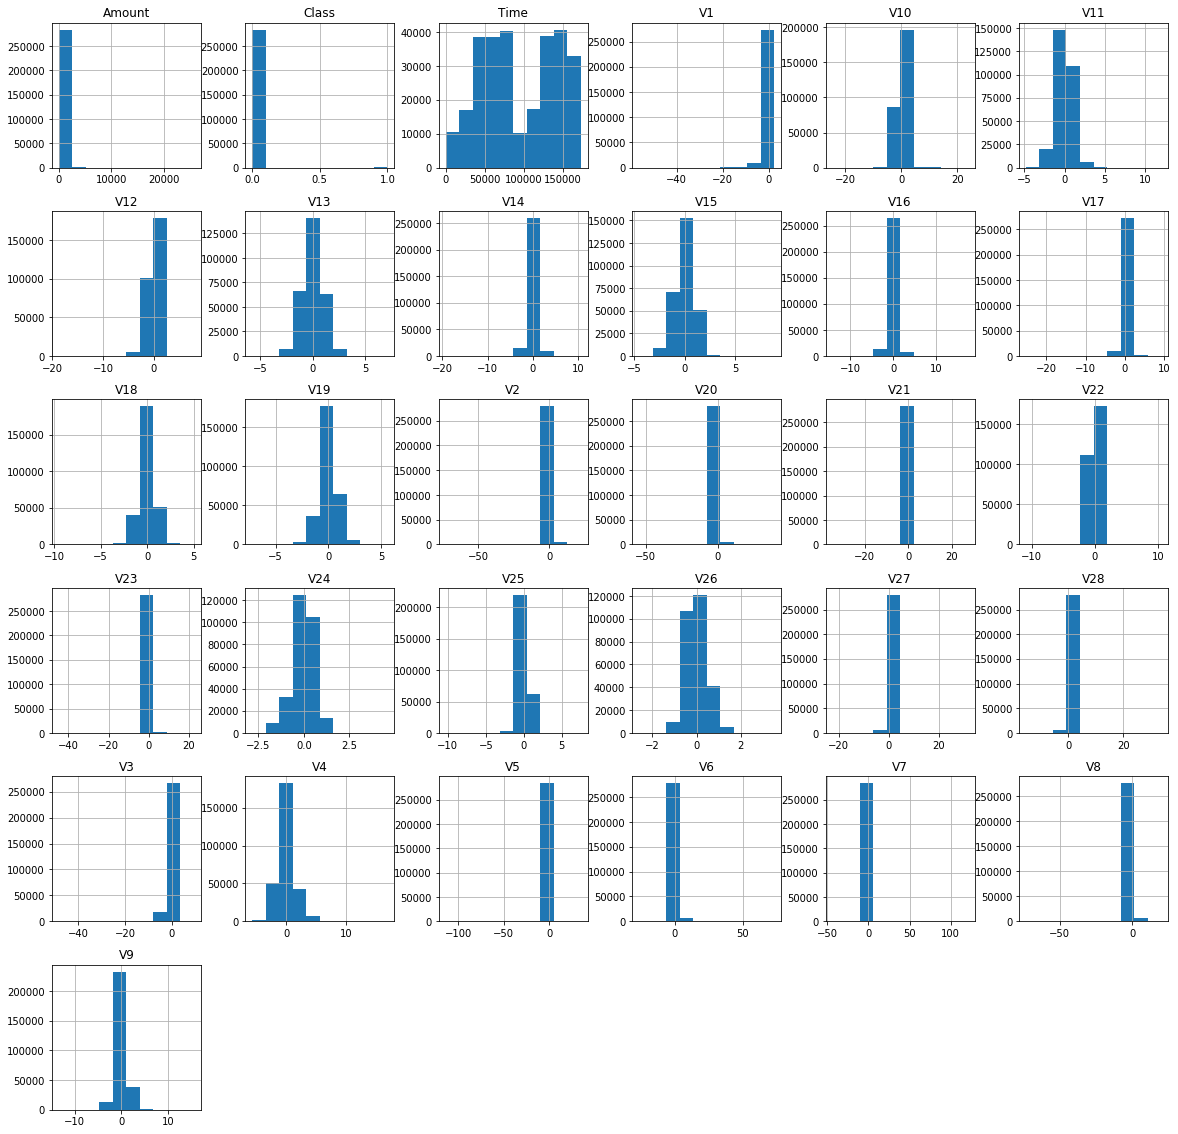

In [17]:
data_file.hist(figsize=(20,20))
plt.show()

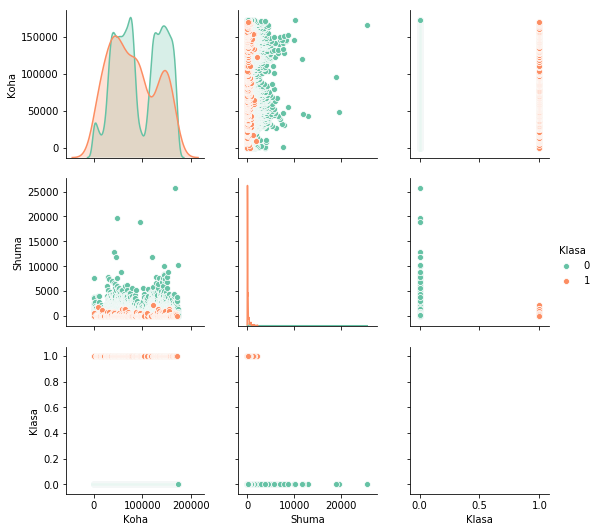

In [18]:
time = data_file['Time']
amount = data_file['Amount']
Class = data_file['Class']

p = sns.pairplot(pd.DataFrame(list(zip(time, amount, Class)), columns=['Koha','Shuma','Klasa']), hue='Klasa', palette="Set2")

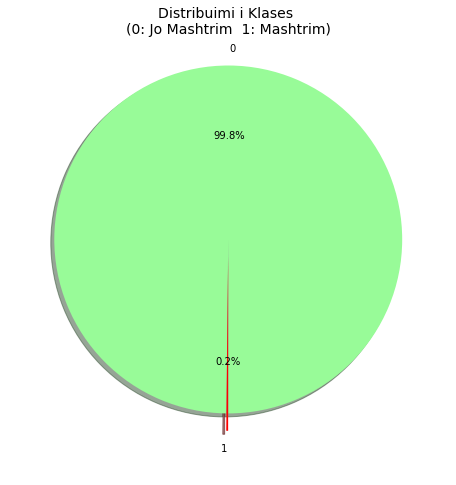

In [19]:
labels = data_file['Class'].value_counts(sort = True).index
sizes = data_file['Class'].value_counts(sort = True)

colors = ["palegreen","red"]
explode = (0.1,0)
 
rcParams['figure.figsize'] = 8,8

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270)
 
plt.title('Distribuimi i Klases \n(0: Jo Mashtrim  1: Mashtrim)', size=14)
plt.show()

Text(0.5, 1.0, 'Distribuimi i Klases \n(0: Jo Mashtrim  1: Mashtrim)')

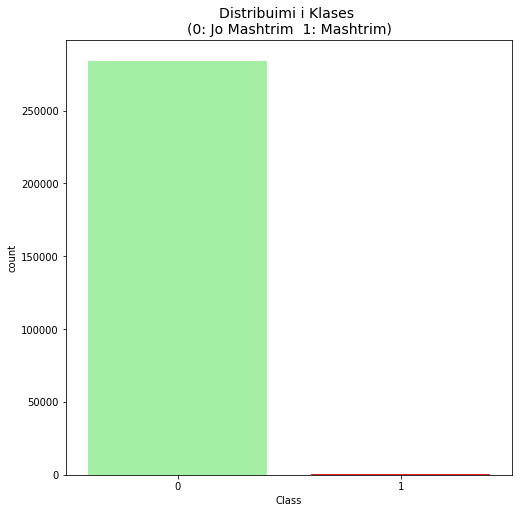

In [20]:
sns.countplot('Class', data=data_file, palette=colors)
plt.title('Distribuimi i Klases \n(0: Jo Mashtrim  1: Mashtrim)', size=14)

In [21]:
x = data_file.loc[:,data_file.columns != 'Class']
y = data_file['Class']

In [22]:
logistic_regression_model = LogisticRegression()
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.4, random_state = 1)
logistic_regression_model.fit(xtrain, ytrain)

test_pred  = logistic_regression_model.predict(xtest)

In [23]:
cm = confusion_matrix(ytest, test_pred)
classNames = ['0','1']
rcParams['figure.figsize'] = 4, 4
def plot_confusion_matrix(cm, classes,
                      title='Confusion matrix',
                      cmap=plt.cm.GnBu):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    cm = confusion_matrix(ytest, test_pred)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), horizontalalignment="center", size = 15, color = "black")
    plt.show()
    print(classification_report(ytest, test_pred))

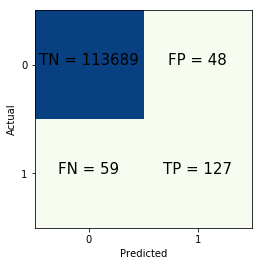

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113737
           1       0.73      0.68      0.70       186

    accuracy                           1.00    113923
   macro avg       0.86      0.84      0.85    113923
weighted avg       1.00      1.00      1.00    113923



In [24]:
plot_confusion_matrix(cm,  classNames)

In [25]:
roc_auc_score(ytest, test_pred)

0.8411868363355907

In [26]:
random_forest_model = RandomForestClassifier(n_estimators=20, max_depth = 10, min_samples_split = 20)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.4, random_state = 1)
random_forest_model.fit(xtrain, ytrain)

test_pred  = random_forest_model.predict(xtest)

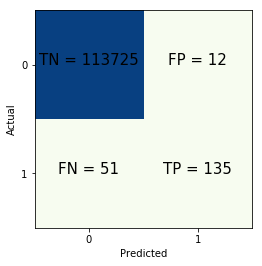

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113737
           1       0.92      0.73      0.81       186

    accuracy                           1.00    113923
   macro avg       0.96      0.86      0.91    113923
weighted avg       1.00      1.00      1.00    113923



In [27]:
plot_confusion_matrix(cm,  classNames)

In [28]:
roc_auc_score(ytest, test_pred)

0.8628504725247579

In [29]:
smote = SMOTE(random_state = 1)
over_sample_x, over_sample_y = smote.fit_sample(x, y)

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(over_sample_x, over_sample_y, test_size = 0.4, random_state = 1)
logistic_regression_model.fit(xtrain, ytrain)

test_pred  = logistic_regression_model.predict(xtest)

roc_auc_logistic_regression = roc_auc_score(ytest, test_pred)

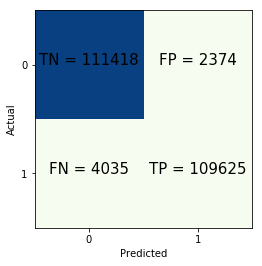

              precision    recall  f1-score   support

           0       0.97      0.98      0.97    113792
           1       0.98      0.96      0.97    113660

    accuracy                           0.97    227452
   macro avg       0.97      0.97      0.97    227452
weighted avg       0.97      0.97      0.97    227452



In [31]:
plot_confusion_matrix(cm,  classNames)

In [32]:
print("Saktesia e algoritmit Logistic Regression eshte: ",roc_auc_logistic_regression)

Saktesia e algoritmit Logistic Regression eshte:  0.9718183787907098


In [33]:
random_forest_model = RandomForestClassifier(n_estimators=20, max_depth = 10, min_samples_split = 20)
xtrain, xtest, ytrain, ytest = train_test_split(over_sample_x, over_sample_y, test_size = 0.4, random_state = 1)
random_forest_model.fit(xtrain, ytrain)

test_pred  = random_forest_model.predict(xtest)

roc_auc_random_forest = roc_auc_score(ytest, test_pred)

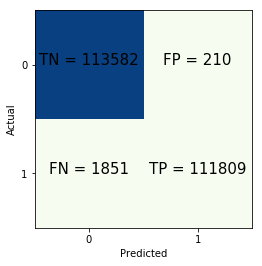

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    113792
           1       1.00      0.98      0.99    113660

    accuracy                           0.99    227452
   macro avg       0.99      0.99      0.99    227452
weighted avg       0.99      0.99      0.99    227452



In [34]:
plot_confusion_matrix(cm,  classNames)

In [35]:
print("Saktesia e algoritmit Random Forest eshte: ",roc_auc_random_forest)

Saktesia e algoritmit Random Forest eshte:  0.9909345574624415


In [36]:
print("Saktesia e algoritmit Logistic Regression eshte: ",roc_auc_logistic_regression)
print("Saktesia e algoritmit Random Forest eshte:       ",roc_auc_random_forest)

Saktesia e algoritmit Logistic Regression eshte:  0.9718183787907098
Saktesia e algoritmit Random Forest eshte:        0.9909345574624415


In [37]:
print(test_pred)

[0 0 1 ... 0 1 1]


In [38]:
for x, y in zip(test_pred, ytest):
    print(f"Predicted:{x}     Actual:{y}")

Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:1
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:0     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:1
Predicted:0     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:1


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:1
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:1
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0


Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1


Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:1     Actual:1
Predicted:0     Actual:0


In [39]:
error = 1 - roc_auc_random_forest
error_percentage = error*100
print(f"Shkalla e gabimit ne raport me saktesine e algoritmit eshte: {round(error_percentage, 2)}%")

Shkalla e gabimit ne raport me saktesine e algoritmit eshte: 0.91%


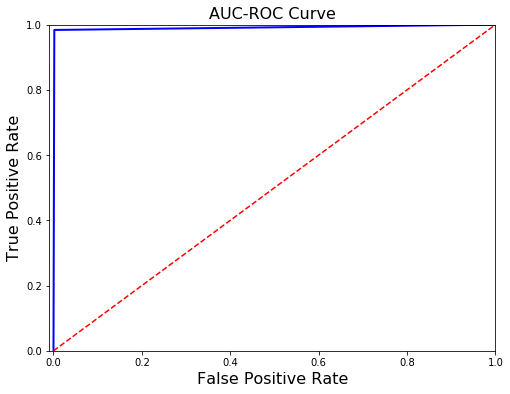

In [43]:
fpr, tpr, thresold = roc_curve(ytest, test_pred)
def auc_roc_curve(fpr, tpr):
    plt.figure(figsize=(8,6))
    plt.title('AUC-ROC Curve', fontsize=16)
    plt.plot(fpr, tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
auc_roc_curve(fpr, tpr)
plt.show()

Text(0.5, 1.0, 'Distribuimi i Klases pas teknikes SMOTE\n(0: Jo Mashtrim  1: Mashtrim)')

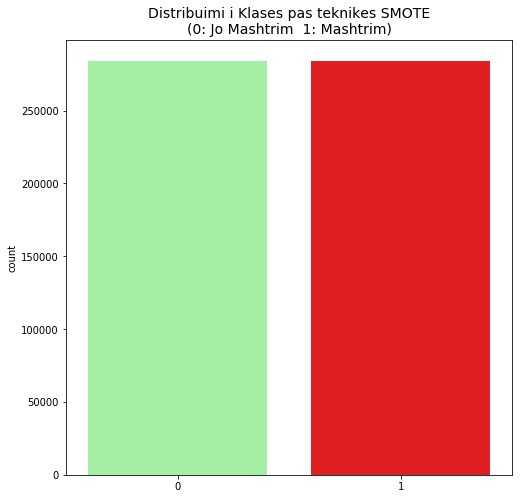

In [42]:
sns.countplot(over_sample_y, data=data_file, palette=colors)
rcParams['figure.figsize'] = 8, 8
plt.title('Distribuimi i Klases pas teknikes SMOTE\n(0: Jo Mashtrim  1: Mashtrim)', size=14)